<a href="https://colab.research.google.com/github/saks0106/Frequent-Lookouts/blob/main/LR_perceptron_trick_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
from sklearn.datasets import make_classification
import numpy as np
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=10) #class_sep ie 2 classes will be seperated by 10

In [75]:
import matplotlib.pyplot as plt

In [76]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

<IPython.core.display.Javascript object>

In [77]:
X.shape

(100, 2)

In [78]:
np.ones(X.shape[1])

array([1., 1.])

In [79]:
def perceptron(X,y):
    
    X = np.insert(X,0,1,axis=1) #at 0th index add 1 for Bo
    weights = np.ones(X.shape[1])
    lr = 0.1
    
    for i in range(1000): #1000 epochs
        j = np.random.randint(0,100) #picking random points of 100 rows
        y_hat = step(np.dot(X[j],weights)) #eg X[42],[1,1,1]
        weights = weights + lr*(y[j]-y_hat)*X[j]
        
    return weights[0],weights[1:]
        

In [80]:
np.dot(np.insert(X[41],0,1),[1,1,1])

0.2946000908036749

In [81]:
step(-123)

0

In [82]:
def step(z):
    return 1 if z>0 else 0

In [83]:
intercept_,coef_ = perceptron(X,y)

In [84]:
print(coef_)
print(intercept_)

[1.33188352 0.15897566]
1.0


In [85]:
m = -(coef_[0]/coef_[1]) # -A/B
b = -(intercept_/coef_[1]) # -C/B

In [86]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + b

In [87]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

<IPython.core.display.Javascript object>

(-3.0, 2.0)

In [88]:
def perceptron(X,y):
    
    m = []
    b = []
    
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    
    for i in range(200):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]
        
        m.append(-(weights[1]/weights[2]))
        b.append(-(weights[0]/weights[2]))
        
    return m,b

In [89]:
m,b = perceptron(X,y)

In [90]:
%matplotlib inline
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

/usr/local/lib/python3.10/dist-packages/matplotlib/animation.py:884: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

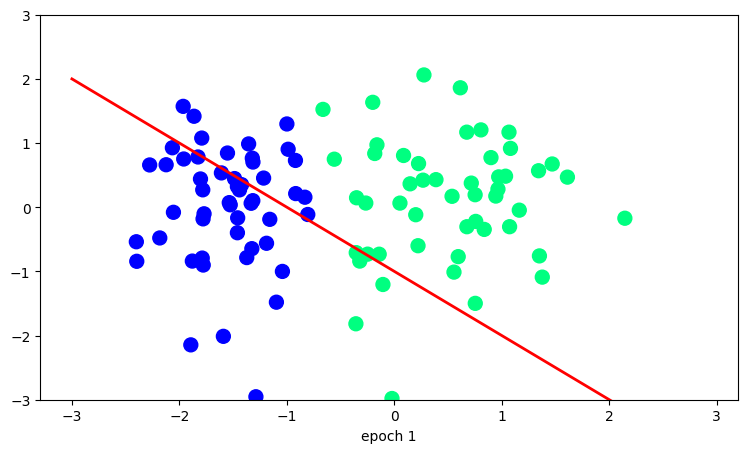

In [91]:
fig, ax = plt.subplots(figsize=(9,5))

x_i = np.arange(-3, 3, 0.1)
y_i = x_i*m[0] +b[0]
ax.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
line, = ax.plot(x_i, x_i*m[0] +b[0] , 'r-', linewidth=2)
plt.ylim(-3,3)
def update(i):
    label = 'epoch {0}'.format(i + 1)
    line.set_ydata(x_i*m[i] + b[i])
    ax.set_xlabel(label)
    # return line, ax

anim = FuncAnimation(fig, update, repeat=True, frames=200, interval=100)

In [92]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression()
lor.fit(X,y)

LogisticRegression()

In [93]:
m = -(lor.coef_[0][0]/lor.coef_[0][1])
b = -(lor.intercept_/lor.coef_[0][1])

In [94]:
x_input1 = np.linspace(-3,3,100)
y_input1 = m*x_input + b

(-3.0, 2.0)

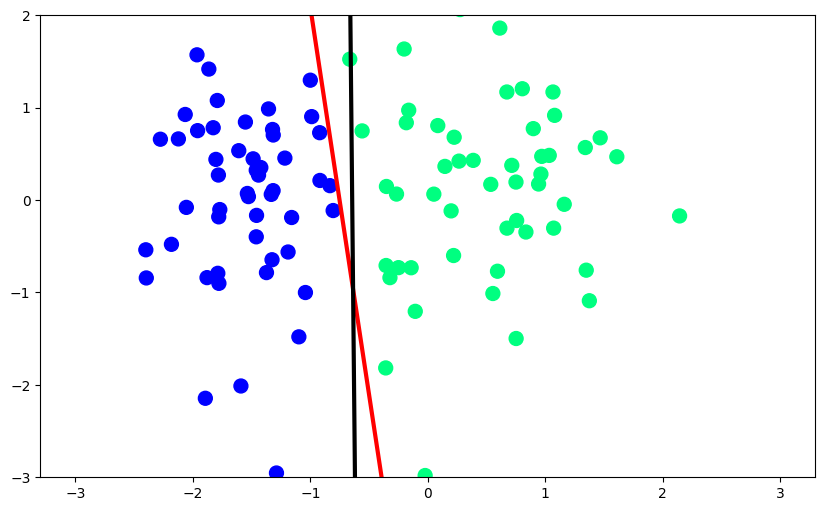

In [95]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(x_input1,y_input1,color='black',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

#black is Logistics Regression class with proper seperation. This is because LR class kept on improving while our custom class stopped where improvement stopped
#Perceptron Trick may work on training but may not work on test data and overfitting can happen